In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

sns.set()

In [2]:
# Retrieve simulation parameters

simulationParameters = np.loadtxt("simulationParameters.txt")

NSITES = int(simulationParameters[0])
dt = simulationParameters[1]
beta = simulationParameters[2]
L = int(simulationParameters[3])
t = simulationParameters[4]
U = simulationParameters[5]
totalMCSweeps = int(simulationParameters[6])

# Load weights to plot

weightsNaive = np.loadtxt("weightsNaive.txt")

weightsUpdate = np.loadtxt("weightsUpdate.txt")

M = weightsNaive.size

time = np.arange(M)/NSITES/L   #measured in sweeps

directory1 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U))

directory2 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '/data-to-reproduce')
            
if not os.path.exists(directory1):
    os.makedirs(directory1)
    
if not os.path.exists(directory2):
    os.makedirs(directory2)
    
np.savetxt(directory2 + '/weightsNaive_' \
           + 'totalMCSweeps_' + str(totalMCSweeps) + '.txt', (weightsNaive))
np.savetxt(directory2 + '/weightsUpdate_' \
           + 'totalMCSweeps_' + str(totalMCSweeps) + '.txt', (weightsUpdate))
np.savetxt(directory2 + '/simulationParameters_' \
           + 'totalMCSweeps_' + str(totalMCSweeps) + '.txt', (simulationParameters))

Text(0,0.5,'$\\log [ P(h) ] + \\log (Z/A)$')

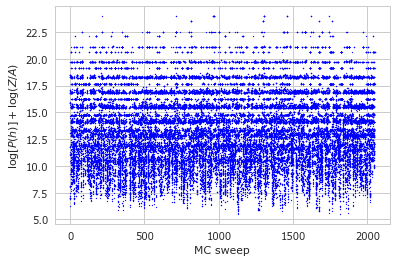

In [5]:
sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
plt.scatter(time, np.log(weightsNaive), s = 1, color = 'b')
#plt.scatter(time, np.log(weightsUpdate), s = 1, color = 'g')
plt.xlabel('MC sweep')
plt.ylabel(r'$\log [ P(h) ] + \log (Z/A)$')
#plt.savefig(directory1 + '/weightsVsMCstep' + str(totalMCSweeps) + 'sweeps'
#            + '.png', dpi = 600)